# Laboratory 1 - Edges and Lines

## 1 -

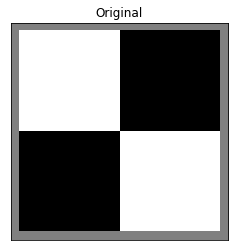

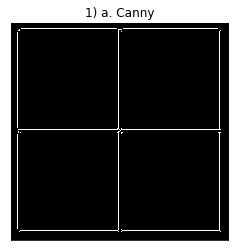

In [1]:
import cv2
import numpy as np
import sys
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

img = cv2.imread('ps1-input0.png',0)
edges = cv2.Canny(img,100,200,1,7,True)

plt.figure()
plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edges,cmap='gray')
plt.title('1) a. Canny'), plt.xticks([]), plt.yticks([])
plt.show()


img=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);

## 2 -

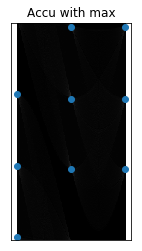

In [2]:
def houghManual(edges,accuracyDrop=1,ticksTheta=1.):
    #accuracyDrop parameter designed to group multiple pixels. New diagonal = 1/accuracyDrop
    #ticksTheta discretization of theta. How many ticks will there be in one degree
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    aMax=int((diag)/accuracyDrop) #we take the diagonal and scale it
    bMax=int(180*ticksTheta)+1 #from 0 to pi, origin being bottom left corner
    accu=np.zeros((aMax,bMax))
    y_idx, x_idx = np.nonzero(edges) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idx)): # cycle through edge points
        x = x_idx[i]
        y = y_idx[i]
        for j in range(0, bMax): # cycle through thetas and calc rho
            deg=j-90
            rho = int((x * np.cos(np.deg2rad(deg/ticksTheta)) +y * np.sin(np.deg2rad(deg/ticksTheta))))
            accu[int(rho/accuracyDrop), j] += 1
    return accu


accuracyDrop=1
ticksTheta=1.    
accu=houghManual(edges,accuracyDrop,ticksTheta) 
#  find peaks
xy = peak_local_max(accu, min_distance=20,threshold_rel=0.5,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
plt.figure()
imgplot = plt.imshow(accu,cmap='gray')
plt.title('Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y,x)
plt.show()

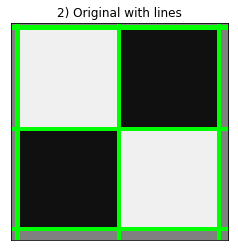

In [3]:
def plotHough(x,y,image,title):
    lineConstant=10000
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    for i in range(0,len(x)):
        rho=x[i]
        theta=y[i]-90
        a=np.cos(np.deg2rad(theta/ticksTheta))
        b=np.sin(np.deg2rad(theta/ticksTheta))
        x1Image=int(a*rho*accuracyDrop-lineConstant*b) #x in hough space is rho
        y1Image=int(b*rho*accuracyDrop+lineConstant*a)
        x2Image=int(a*rho*accuracyDrop+lineConstant*b)
        y2Image=int(b*rho*accuracyDrop-lineConstant*a)
        #print('a='+str(a)+' b='+str(b)+' x1='+str(x1Image)+' y1='+str(y1Image)+' x2='+str(x2Image)+' y2='+str(y2Image))
        cv2.line(image,(x1Image,y1Image),(x2Image,y2Image), (0,255,0),3)
    plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

plotHough(x,y,img,'2) Original with lines')

#### 2 - I chose the accumulator to have a size that can be adjusted with the parameters accuraryDrop and TicksTetha. The more we increase accuracy drop, the more pixels an accumulator bin will represent. (We take fewer bins). The number of bins will be (size of the diagonal)/accuracyDrop.

#### Similarly, the more we increase TicksTetha, the more bins will be in the accumulator in the angles. Every angle will be between 0 and 180 degrees, to match with the formulas in the code

### 2 - Gradiant implementation for lines

In [4]:
def houghManualGradiant(edges,image,accuracyDrop=1):
    #accuracyDrop parameter designed to group multiple pixels. New diagonal = 1/accuracyDrop
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    aMax=int((diag)/accuracyDrop) #we take the diagonal and scale it
    bMax=int(360)+1 #from 0 to pi/2, origin being bottom left corner
    accu=np.zeros((aMax,bMax))
    y_idx, x_idx = np.nonzero(edges) # find all edge (nonzero) pixel indexes

    gxx=cv2.Sobel(image,cv2.CV_32FC1,1,0);
    gyy=cv2.Sobel(image,cv2.CV_32FC1,0,1);
    thetaArray=cv2.phase(gxx,gyy);

    
    for i in range(len(x_idx)): # cycle through edge points
        x = x_idx[i]
        y = y_idx[i] # cycle through thetas and calc rho
        deg=thetaArray[y,x]
        rho = int((x * np.cos(deg) +y * np.sin(deg)))
        accu[int(rho/accuracyDrop), int(np.rad2deg(deg))] += 1
    return accu




In [5]:
def plotHoughGradiant(x,y,image,title):
    lineConstant=10000
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    for i in range(0,len(x)):
        rho=x[i]
        theta=y[i]
        a=np.cos(np.deg2rad(theta))
        b=np.sin(np.deg2rad(theta))
        x1Image=int(a*rho*accuracyDrop-lineConstant*b) #x in hough space is rho
        y1Image=int(b*rho*accuracyDrop+lineConstant*a)
        x2Image=int(a*rho*accuracyDrop+lineConstant*b)
        y2Image=int(b*rho*accuracyDrop-lineConstant*a)
        #print('a='+str(a)+' b='+str(b)+' x1='+str(x1Image)+' y1='+str(y1Image)+' x2='+str(x2Image)+' y2='+str(y2Image))
        cv2.line(image,(x1Image,y1Image),(x2Image,y2Image), (0,255,0),3)
    plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

## 3 -

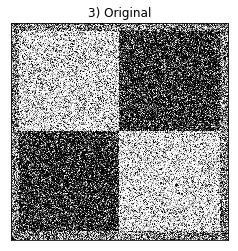

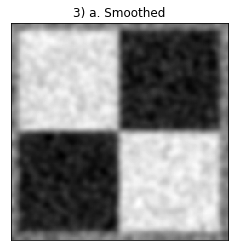

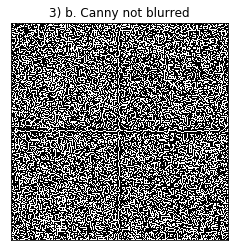

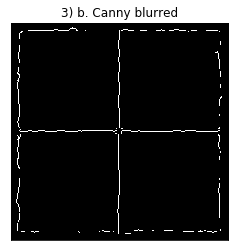

In [6]:
imgNoise = cv2.imread('ps1-input0-noise.png',0)
blur = cv2.GaussianBlur(imgNoise,(19,19),0)
edgesBlurred = cv2.Canny(blur,850,1000,1,5,True)
edgesNoise = cv2.Canny(imgNoise,850,1000,1,5,True)
#The canny process seems to be pivital, as we get a nice image suitable for hough

plt.figure()
plt.imshow(imgNoise,cmap='gray')
plt.title('3) Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(blur,cmap='gray')
plt.title('3) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edgesNoise,cmap='gray')
plt.title('3) b. Canny not blurred'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('3) b. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()


imgNoise=cv2.cvtColor(imgNoise, cv2.COLOR_GRAY2BGR); 


In [7]:
accuracyDrop=2#diagonal is reduced by half
ticksTheta=2.#we go from 0.5deg to 0.5
accu=houghManual(edgesBlurred,accuracyDrop,ticksTheta) 



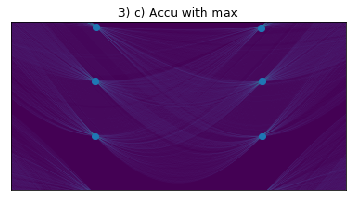

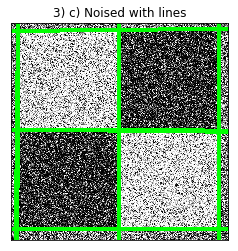

In [ ]:
#  find peaks
# Parameters were tuned to best find the edges
xy = peak_local_max(accu, min_distance=5,threshold_rel=0.5,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
plt.figure()
imgplot = plt.imshow(accu)
plt.title('3) c) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y,x)
plt.show()

plotHough(x,y,imgNoise,'3) c) Noised with lines')


To find optimal results, I had to play with the hyper parameters, accuracyDrop and TicksTetha described in the previous answer. The most important step was toapply the right gaussian blur and find good Canny values

## 4 -

In [ ]:
imgNoise = cv2.imread('ps1-input1.jpg')
blur = cv2.GaussianBlur(imgNoise,(19,19),0)
edgesBlurred = cv2.Canny(blur,0,1200,1,5,True)

b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('4) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('4) b. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
accuracyDrop=2#diagonal is reduced by half in hough space
ticksTheta=2.#we go from 0.5deg to 0.5
accu2=houghManual(edgesBlurred,accuracyDrop,ticksTheta) 


In [ ]:
#  find peaks
# Parameters were tunedto best find the edges
xy2 = peak_local_max(accu2, min_distance=5,threshold_rel=0.5,exclude_border=0)
x2= [item[0] for item in xy2]
y2= [item[1] for item in xy2]
    
fig=plt.figure()
imgplot = plt.imshow(accu2)
plt.title('4) c) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(y2,x2)
plt.show()

#fig2 =plt.figure(figsize=(20.0, 10.0))
plotHough(x2,y2,imgNoiseRgb,'4) c) Noised with lines')

#fig2.savefig("fig2.png")

In this question, again, tunning the hyper parameters was important, but the most important thing was to do the right local maxima finding, using a strong threshold an small minimal distance.

## 5 -

In [ ]:
def houghCircleManual(edges,image,accuracyDrop=1,radMin=10,radMax=11):
    #accuracyDrop parameter designed to group multiple pixels. New diagonal = 1/accuracyDrop
    #ticksTheta discretization of theta. How many ticks will there be in one degree
    height, width = edges.shape
    aMax=int(width/accuracyDrop)
    bMax=int(height/accuracyDrop)
    
    radSize=int((radMax-radMin))+1
    
    gxx=cv2.Sobel(image,cv2.CV_32FC1,1,0);
    gyy=cv2.Sobel(image,cv2.CV_32FC1,0,1);
    thetaArray=cv2.phase(gxx,gyy);
    
    accu=np.zeros((aMax,bMax,radSize))
    y_idx, x_idx = np.nonzero(edges) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idx)): # cycle through edge points
        x = x_idx[i]
        y = y_idx[i]
        for j in range(0, radSize): # cycle through thetas and calc rho
            rad=radMin+j
            theta=thetaArray[y,x]
            a=int(int(x-rad*np.cos(theta))/accuracyDrop)
            b=int(int(y-rad*np.sin(theta))/accuracyDrop)
            #print('a='+str(a)+' b='+str(b)+' rad='+str(rad))
            if(a<aMax and b<bMax):
                accu[a,b,int(rad-radMin)] += 1
    return accu




In [ ]:
def plotHoughCircle(x,y,r,image,title,radMin,radMax):
    height, width = edges.shape
    diag=np.ceil(np.sqrt((height)**2 + (width)**2)) #we compute the diagonal
    for i in range(0,len(x)):      
        #print('a='+str(a)+' b='+str(b)+' x1='+str(x1Image)+' y1='+str(y1Image)+' x2='+str(x2Image)+' y2='+str(y2Image))
        cv2.circle(image,(x[i]*accuracyDrop,y[i]*accuracyDrop),r[i]+radMin, color=(0,255,0),thickness=3)
    plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()


In [ ]:
imgNoise = cv2.imread('ps1-input1.jpg')
imgNoiseGrey = cv2.imread('ps1-input1.jpg',0)
blur = cv2.GaussianBlur(imgNoise,(3,3),0)
blurGrey = cv2.GaussianBlur(imgNoiseGrey,(3,3),0)
edgesBlurred = cv2.Canny(blur,600,1200,1,5,True)


b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('5) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('5) a. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()


gxx=cv2.Sobel(blurGrey,cv2.CV_32FC1,1,0);
gyy=cv2.Sobel(blurGrey,cv2.CV_32FC1,0,1);
thetaTest=cv2.phase(gxx,gyy,angleInDegrees=True);


plt.imshow(thetaTest)
plt.title('Gradiant direction'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
radMin=15
radMax=30
accuracyDrop=3
accu=houghCircleManual(edgesBlurred,blurGrey,accuracyDrop,radMin,radMax)
plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(accu[:,:,1].transpose())
plt.show()

In [ ]:
#  find peaks
xyr = peak_local_max(accu, min_distance=15,threshold_rel=0.48,exclude_border=0)
x= [item[0] for item in xyr]
y= [item[1] for item in xyr]
r= [item[2] for item in xyr]
#print(xyr)

In [ ]:
imgNoise = cv2.imread('ps1-input1.jpg')
b,g,rc = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([rc,g,b])     # switch it to rgb

plotHoughCircle(x,y,r,imgNoiseRgb,'5) a. Original with circles',radMin,radMax)

To find the circles, one really important step was to find the right parameters for the blur and the canny. Reasults varry greatly depending on how we use our input images (for exemple bluring or not before finding gradiant direction). I am confident that it is still possible to find better hyper parameters to detect more circles.

## 6 -

In [ ]:
imgNoise = cv2.imread('ps1-input2.jpg')
imgNoiseGrey = cv2.imread('ps1-input2.jpg',0)
blur = cv2.GaussianBlur(imgNoise,(9,9),0)
edgesBlurred = cv2.Canny(blur,100,140,1,3)

b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('6) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('6) b. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
accuracyDrop=3
accu=houghManualGradiant(edgesBlurred,imgNoiseGrey,accuracyDrop)
plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(accu.transpose())
plt.show()

#  find peaks
# Parameters were tunedto best find the edges
xy = peak_local_max(accu, min_distance=4,threshold_rel=0.09,exclude_border=0)
x= [item[0] for item in xy]
y= [item[1] for item in xy]
    
fig=plt.figure()
imgplot = plt.imshow(accu.transpose())
plt.title('6) a) Accu with max'), plt.xticks([]), plt.yticks([])
plt.scatter(x,y)
plt.show()

#fig2 =plt.figure(figsize=(20.0, 10.0))
plotHoughGradiant(x,y,imgNoiseRgb,'6) a) Noised with lines')

#fig2.savefig("fig2.png")


#### 6 a - I had to use the gradiant version of line Hough, and play with the thresolds

#### 6 b - There are some lines detected that correspond to adges of the books, texture, and aligned coins. One way to solve it could be to look for parallel lines

## 7 -

In [ ]:
imgNoise = cv2.imread('ps1-input2.jpg')
imgNoiseGrey = cv2.imread('ps1-input2.jpg',0)
blur = cv2.GaussianBlur(imgNoise,(3,3),0)
blurGrey = cv2.GaussianBlur(imgNoiseGrey,(3,3),0)
edgesBlurred = cv2.Canny(blur,600,1200,1,5,True)


b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('7) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('7) a. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()


gxx=cv2.Sobel(blurGrey,cv2.CV_32FC1,1,0);
gyy=cv2.Sobel(blurGrey,cv2.CV_32FC1,0,1);
thetaTest=cv2.phase(gxx,gyy,angleInDegrees=True);


plt.imshow(thetaTest)
plt.title('Gradiant direction'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
radMin=20
radMax=30
accuracyDrop=2
accu=houghCircleManual(edgesBlurred,blurGrey,accuracyDrop,radMin,radMax)
plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(accu[:,:,1].transpose())
plt.show()

In [ ]:
#  find peaks
xyr = peak_local_max(accu, min_distance=15,threshold_rel=0.3,exclude_border=0)
x= [item[0] for item in xyr]
y= [item[1] for item in xyr]
r= [item[2] for item in xyr]
#print(xyr)

In [ ]:
imgNoise = cv2.imread('ps1-input2.jpg')
b,g,rc = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([rc,g,b])     # switch it to rgb

plotHoughCircle(x,y,r,imgNoiseRgb,'7) a. Original with circles',radMin,radMax)

#### 7 b - There are some false alarms due to shapes on the book that look like circles. One way to avoid them would be to look for a texture with certain characteristicsinside the circle (bigger variance in the textureof a coin, for example)

# 8 -

In [ ]:
imgNoise = cv2.imread('ps1-input3.jpg')
imgNoiseGrey = cv2.imread('ps1-input3.jpg',0)
blur = cv2.GaussianBlur(imgNoise,(3,3),0)
blurGrey = cv2.GaussianBlur(imgNoiseGrey,(3,3),0)
edgesBlurred = cv2.Canny(blur,600,1200,1,5,True)


b,g,r = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(imgNoiseRgb)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(blur)       # get b,g,r
blurRgb = cv2.merge([r,g,b])     # switch it to rgb
plt.figure()
plt.imshow(blurRgb)
plt.title('8) a. Smoothed'), plt.xticks([]), plt.yticks([])
plt.show()


plt.figure()
plt.imshow(edgesBlurred,cmap='gray')
plt.title('8) a. Canny blurred'), plt.xticks([]), plt.yticks([])
plt.show()


gxx=cv2.Sobel(blurGrey,cv2.CV_32FC1,1,0);
gyy=cv2.Sobel(blurGrey,cv2.CV_32FC1,0,1);
thetaTest=cv2.phase(gxx,gyy,angleInDegrees=True);


plt.imshow(thetaTest)
plt.title('Gradiant direction'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
radMin=20
radMax=30
accuracyDrop=2
accu=houghCircleManual(edgesBlurred,blurGrey,accuracyDrop,radMin,radMax)
plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(accu[:,:,1].transpose())
plt.show()

In [ ]:
#  find peaks
xyr = peak_local_max(accu, min_distance=15,threshold_rel=0.5,exclude_border=0)
x= [item[0] for item in xyr]
y= [item[1] for item in xyr]
r= [item[2] for item in xyr]
#print(xyr)

In [ ]:
imgNoise = cv2.imread('ps1-input3.jpg')
b,g,rc = cv2.split(imgNoise)       # get b,g,r
imgNoiseRgb = cv2.merge([rc,g,b])     # switch it to rgb

plotHoughCircle(x,y,r,imgNoiseRgb,'8) a. Original with circles',radMin,radMax)

#### 8 b - One way to fix the circle finder would be to look for elipses instead of just circles. One other way would be to apply some distortion on the image to make elipses project as circles and then apply the circle finder 